# Classifying Iris Species

#### Meet the Data

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() # Returns brunch object which is similar to dictionary with keys and values

In [2]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# key DESCR shows a short description of the dataset
print(iris_dataset['DESCR'][:225] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
...


In [4]:
# target_names contains the value that we want to predict
print("Target Names: {}".format(iris_dataset['target_names']))

Target Names: ['setosa' 'versicolor' 'virginica']


In [5]:
# The value of feature_names is a list of strings, giving the description of each feature
print("Feature Names:\n{}".format(iris_dataset['feature_names']))

Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# The data itself is contained in the target and data fields. data contains the numeric 
# measurements of sepal length, sepal width, petal length, and petal width in a NumPy array
print("Type of Data: {}".format(type(iris_dataset['data'])))

Type of Data: <class 'numpy.ndarray'>


In [7]:
# Rows and columns in the data
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [8]:
# printing the first five columns
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
# The target array contains the species of each of the flowers that were measured, also as a NumPy array
# Target Names: ['setosa' --> 0 'versicolor' --> 1'virginica' --> 2]
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target'])) # values are in the range of 0 to 2

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [10]:
# By default splits into 75% train 25% test data
# Random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=42)

In [11]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (112, 4)
Shape of y_train: (112,)
Shape of X_test: (38, 4)
Shape of y_test: (38,)


#### First Things First: Look at Your Data

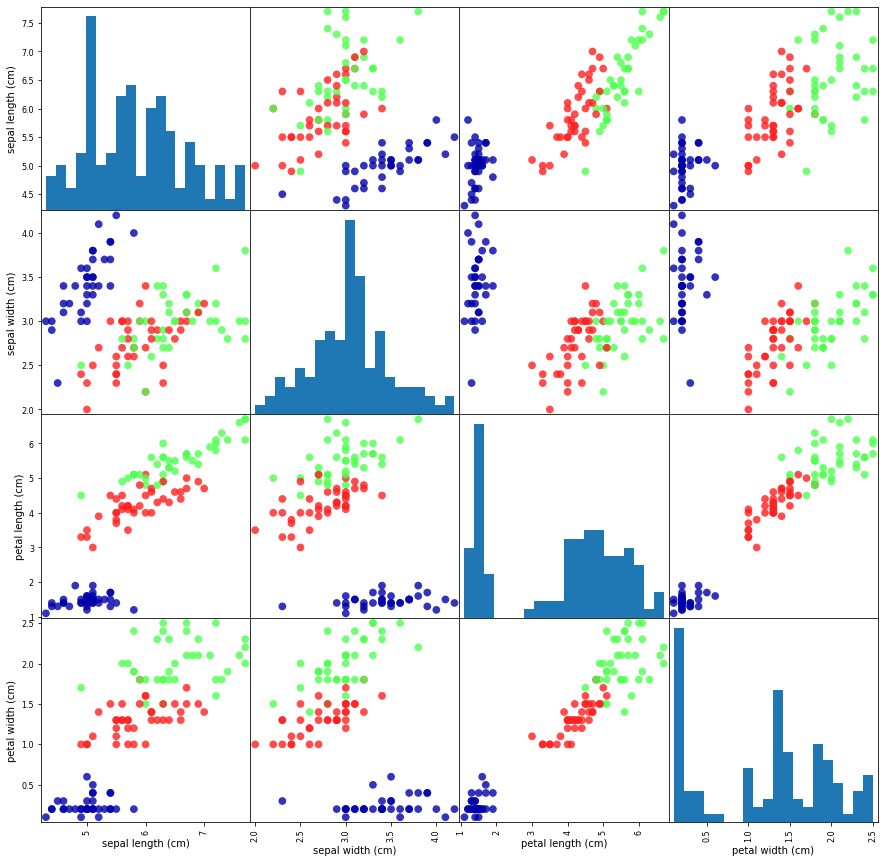

In [21]:
import pandas as pd
import mglearn
import matplotlib

%matplotlib inline

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

#### Building Your First Model: k-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Making Predictions

In [26]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [27]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [28]:
y_pred = knn.predict(X_test)
print("Test set prediction:\n{}".format(y_pred))

Test set prediction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [29]:
print("Test Score: {}".format(np.mean(y_pred == y_test)))

Test Score: 1.0


In [30]:
print("Test Score using Score method: {}".format(knn.score(X_test, y_test)))

Test Score using Score method: 1.0
